#Data Exploration and Pre-processing: 
The Data Contains 3 product category i.e Accessories,Bikes,Clothing
For each product category Data preprocessing ,Data decomposition for trends,seasonality and noise is done



In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Load your time series data
data = pd.read_csv('sales_data_3.csv')
data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [9]:
##Visualizing Clothing Sales Time Series Data

In [10]:
 Clothing= data.loc[data['Product_Category'] == 'Clothing']

In [11]:
print( Clothing['Date'].min(),
       Clothing['Date'].max())

2013-07-01 00:00:00 2016-07-31 00:00:00


In [12]:
Clothing= Clothing.set_index('Date')
Clothing.index

DatetimeIndex(['2013-07-20', '2015-07-20', '2013-11-24', '2015-11-24',
               '2014-02-05', '2016-02-05', '2014-05-12', '2016-05-12',
               '2014-05-11', '2016-05-11',
               ...
               '2013-07-08', '2015-07-08', '2013-12-28', '2015-12-28',
               '2014-04-12', '2016-04-12', '2014-04-02', '2016-04-02',
               '2014-03-04', '2016-03-04'],
              dtype='datetime64[ns]', name='Date', length=16934, freq=None)

In [13]:
#calculating monthly mean of Revenue
x = Clothing['Revenue'].resample('M').mean()
x.reset_index()
x1=pd.DataFrame(x)
x1

,Revenue
Date,
2013-07-31,788.139665
2013-08-31,518.666667
2013-09-30,522.353801
2013-10-31,531.744557
2013-11-30,524.500739
2013-12-31,530.734767
2014-01-31,491.951220
2014-02-28,448.535385
2014-03-31,463.127874


In [14]:
x1.isnull().sum()

Revenue    11
dtype: int64

In [15]:

# Calculate rolling average with a specified window for Handling the missing value
rolling_window =12 # You can adjust this window size according to your needs
x1['Rolling_Avg'] = x1['Revenue'].rolling(window=rolling_window, min_periods=1).mean()

# Fill NaN values in 'Revenue' with corresponding values from 'Rolling_Avg'
x1['Revenue'].fillna(x1['Rolling_Avg'], inplace=True)

print(x1)

               Revenue  Rolling_Avg
Date                               
2013-07-31  788.139665   788.139665
2013-08-31  518.666667   653.403166
2013-09-30  522.353801   609.720044
2013-10-31  531.744557   590.226172
2013-11-30  524.500739   577.081086
2013-12-31  530.734767   569.356699
2014-01-31  491.951220   558.298774
2014-02-28  448.535385   544.578350
2014-03-31  463.127874   535.528297
2014-04-30  476.906122   529.666080
2014-05-31  487.891452   525.868386
2014-06-30  463.694541   520.687232
2014-07-31  474.597911   494.558753
2014-08-31  492.367124   492.367124
2014-09-30  489.368457   489.368457
2014-10-31  484.660001   484.660001
2014-11-30  479.679909   479.679909
2014-12-31  472.386358   472.386358
2015-01-31  469.125547   469.125547
2015-02-28  473.243580   473.243580
2015-03-31  475.772507   475.772507
2015-04-30  475.394635   475.394635
2015-05-31  469.146226   469.146226
2015-06-30  474.597911   474.597911
2015-07-31  797.513966   797.513966
2015-08-31  504.070093   650

NameError: name 'plt' is not defined

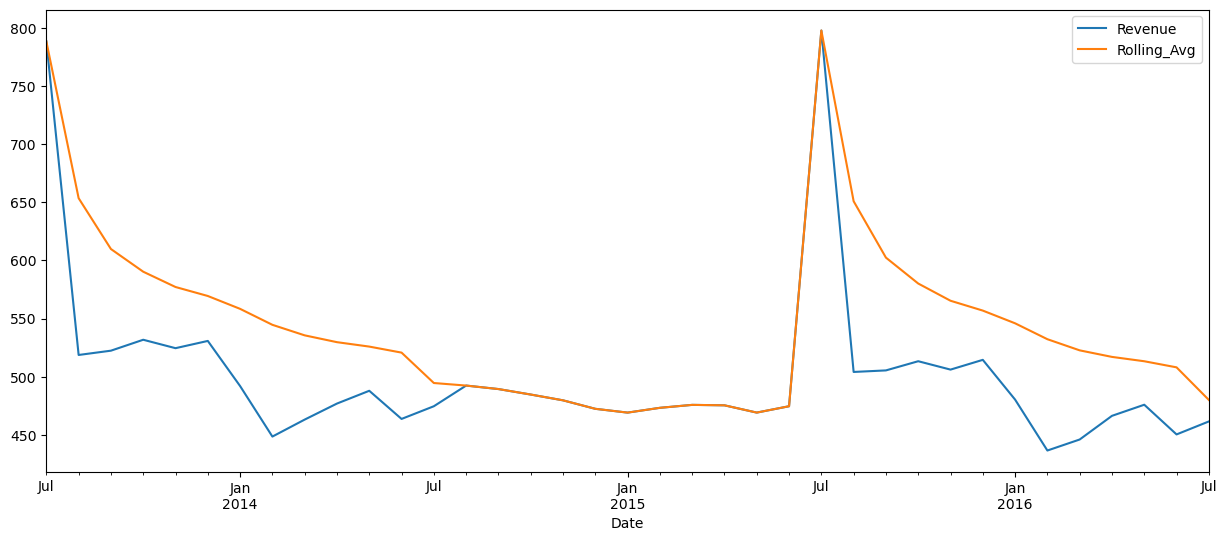

In [16]:
#Graph of Revenue vs date with rolling avg for smothening the graph
x1.plot(figsize=(15, 6))
plt.show()


In [271]:
x1.drop('Rolling_Avg', axis=1, inplace=True)


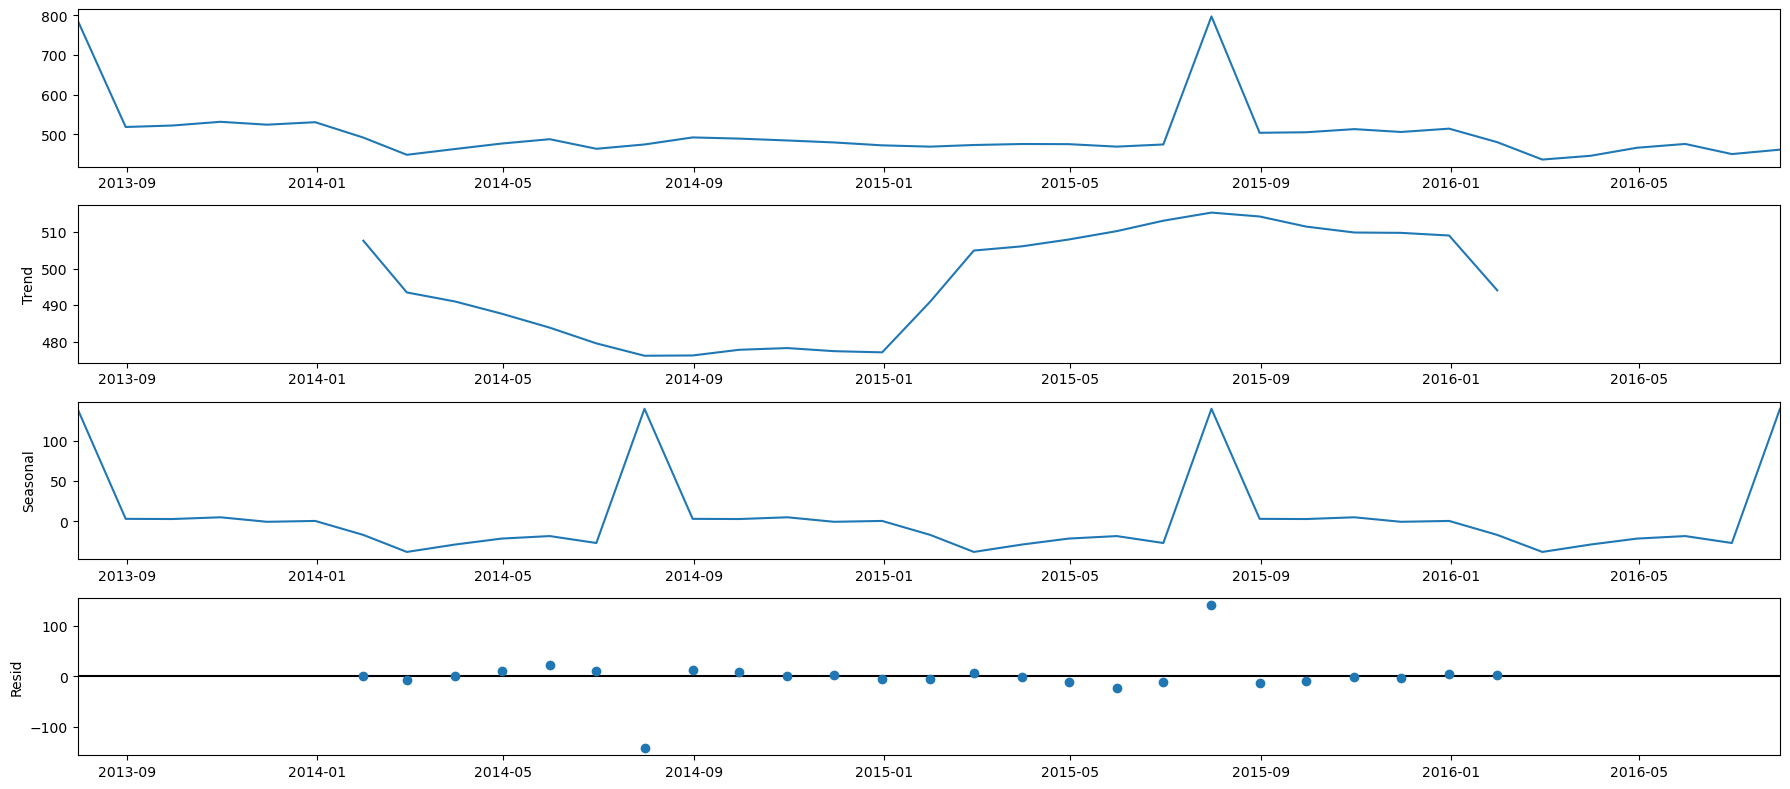

In [272]:
#Decomposing our time series into three distinct components: trend, seasonality, and noise.
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x1, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
##Bikes

In [68]:
Bikes= data.loc[data['Product_Category'] == 'Bikes']

In [69]:
print( Bikes['Date'].min(),
       Bikes['Date'].max())

2011-01-01 00:00:00 2016-06-30 00:00:00


In [70]:
Bikes= Bikes.set_index('Date')
Bikes.index

DatetimeIndex(['2013-01-28', '2015-01-28', '2013-07-22', '2015-07-22',
               '2013-12-25', '2015-12-25', '2014-02-13', '2016-02-13',
               '2013-07-04', '2015-07-04',
               ...
               '2014-04-22', '2016-04-22', '2013-12-05', '2015-12-05',
               '2014-01-18', '2016-01-18', '2014-02-27', '2016-02-27',
               '2014-06-13', '2016-06-13'],
              dtype='datetime64[ns]', name='Date', length=25982, freq=None)

In [274]:
y =Bikes['Revenue'].resample('M').mean()
y.reset_index()
y1=pd.DataFrame(y)
y1

,Revenue
Date,
2011-01-31,3591.452128
2011-02-28,3728.643275
2011-03-31,3560.386935
2011-04-30,3375.758454
2011-05-31,3432.415888
...,...
2016-02-29,2408.641452
2016-03-31,2403.311239
2016-04-30,2436.512295


In [275]:
y1.isnull().sum()

Revenue    6
dtype: int64

In [276]:
# Calculate rolling average with a specified window
rolling_window =7# You can adjust this window size according to your needs
y1['Rolling_Avg'] = y1['Revenue'].rolling(window=rolling_window, min_periods=1).mean()

# Fill NaN values in 'Revenue' with corresponding values from 'Rolling_Avg'
y1['Revenue'].fillna(y1['Rolling_Avg'], inplace=True)

print(y1)

                Revenue  Rolling_Avg
Date                                
2011-01-31  3591.452128  3591.452128
2011-02-28  3728.643275  3660.047701
2011-03-31  3560.386935  3626.827446
2011-04-30  3375.758454  3564.060198
2011-05-31  3432.415888  3537.731336
...                 ...          ...
2016-02-29  2408.641452  2555.475133
2016-03-31  2403.311239  2543.137200
2016-04-30  2436.512295  2518.139078
2016-05-31  2375.233766  2494.679823
2016-06-30  2584.516598  2476.902211

[66 rows x 2 columns]


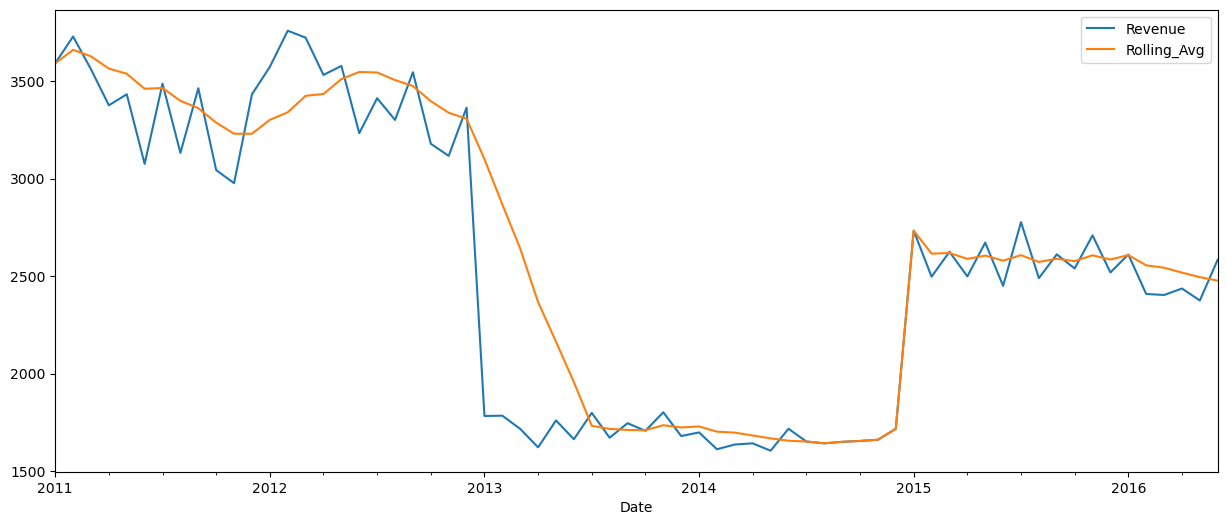

In [277]:
y1.plot(figsize=(15, 6))
plt.show()

In [278]:
y1.drop('Rolling_Avg', axis=1, inplace=True)

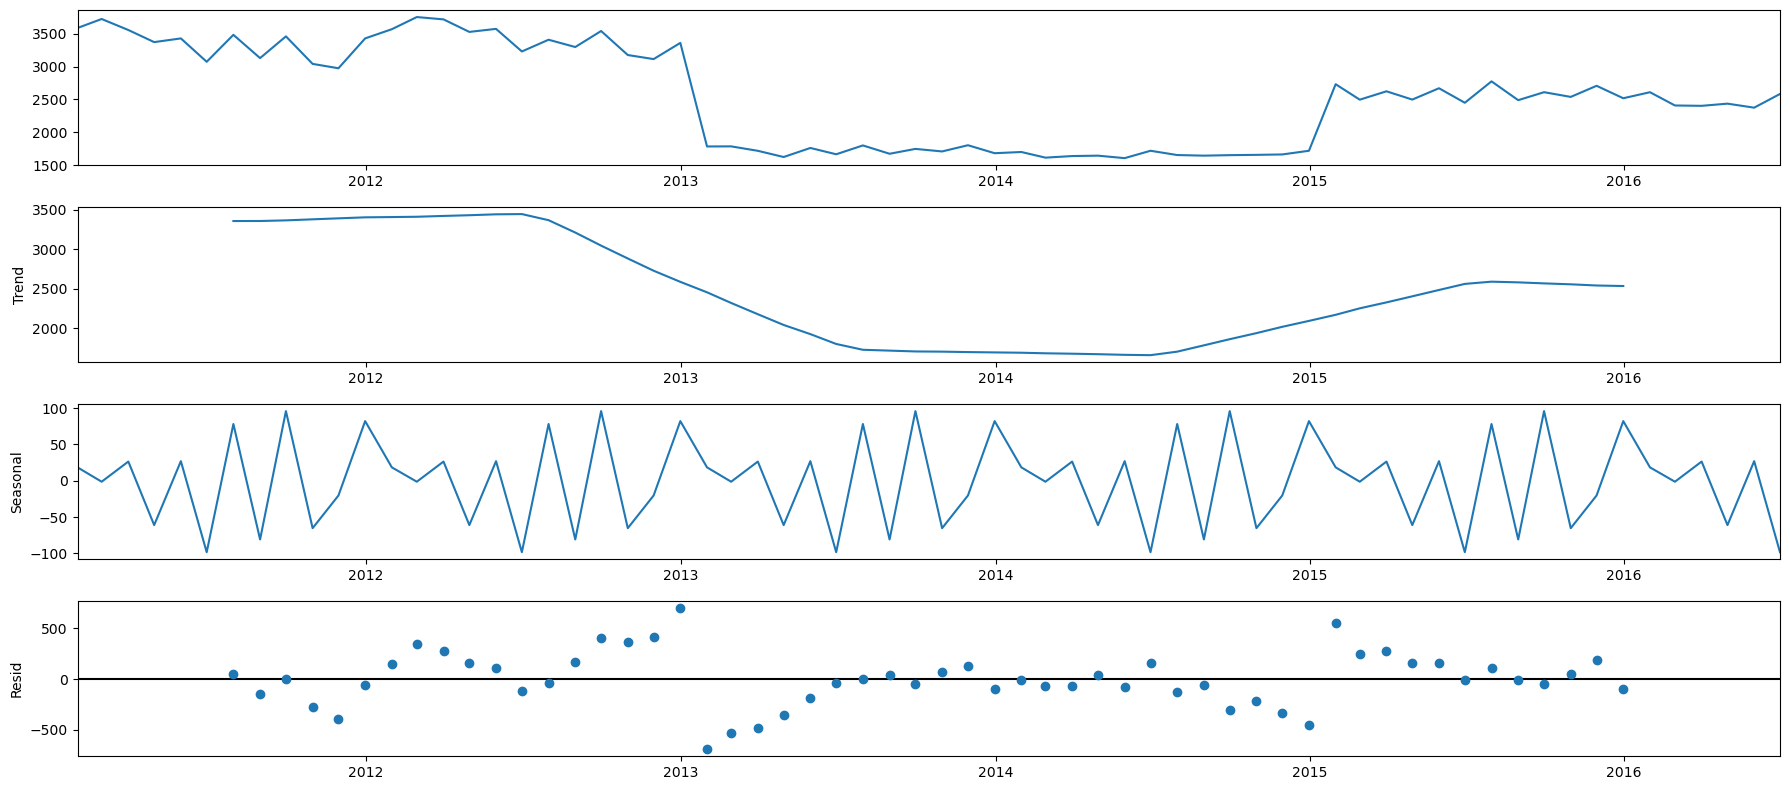

In [280]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decomposition.plot()
plt.show()

##Visualizing Accessories Sales Time Series Data

In [17]:
Accessories = data.loc[data['Product_Category'] == 'Accessories']

In [18]:
print(Accessories['Date'].min(),
      Accessories['Date'].max())


2013-07-01 00:00:00 2016-07-31 00:00:00


In [19]:
Accessories= Accessories.set_index('Date')
Accessories.index



DatetimeIndex(['2013-11-26', '2015-11-26', '2014-03-23', '2016-03-23',
               '2014-05-15', '2016-05-15', '2014-05-22', '2016-05-22',
               '2014-02-22', '2016-02-22',
               ...
               '2016-06-07', '2016-06-07', '2014-03-04', '2014-03-04',
               '2016-03-04', '2016-03-04', '2014-04-27', '2014-04-27',
               '2016-04-27', '2016-04-27'],
              dtype='datetime64[ns]', name='Date', length=70120, freq=None)

In [25]:
z = Accessories['Revenue'].resample('M').mean()
z1=pd.DataFrame(z)
z1

,Revenue
Date,
2013-07-31,229.807799
2013-08-31,224.693885
2013-09-30,233.296254
2013-10-31,216.187654
2013-11-30,221.223651
2013-12-31,229.387852
2014-01-31,205.470180
2014-02-28,213.306855
2014-03-31,218.412298


In [26]:
z1.isnull().sum()

Revenue    11
dtype: int64

In [27]:
# Calculate rolling average with a specified window
rolling_window =12# You can adjust this window size according to your needs
z1['Rolling_Avg'] = z1['Revenue'].rolling(window=rolling_window, min_periods=1).mean()

# Fill NaN values in 'Revenue' with corresponding values from 'Rolling_Avg'
z1['Revenue'].fillna(z1['Rolling_Avg'], inplace=True)

print(z1)

               Revenue  Rolling_Avg
Date                               
2013-07-31  229.807799   229.807799
2013-08-31  224.693885   227.250842
2013-09-30  233.296254   229.265979
2013-10-31  216.187654   225.996398
2013-11-30  221.223651   225.041849
2013-12-31  229.387852   225.766183
2014-01-31  205.470180   222.866754
2014-02-28  213.306855   221.671766
2014-03-31  218.412298   221.309603
2014-04-30  208.634006   220.042044
2014-05-31  222.124627   220.231369
2014-06-30  224.515812   220.588406
2014-07-31  199.000000   218.021090
2014-08-31  217.414472   217.414472
2014-09-30  215.826294   215.826294
2014-10-31  215.786142   215.786142
2014-11-30  215.106454   215.106454
2014-12-31  213.066254   213.066254
2015-01-31  214.332266   214.332266
2015-02-28  214.537349   214.537349
2015-03-31  213.568611   213.568611
2015-04-30  215.213480   215.213480
2015-05-31  211.757906   211.757906
2015-06-30  199.000000   199.000000
2015-07-31  220.646240   220.646240
2015-08-31  217.963460   219

AttributeError: module 'matplotlib' has no attribute 'show'

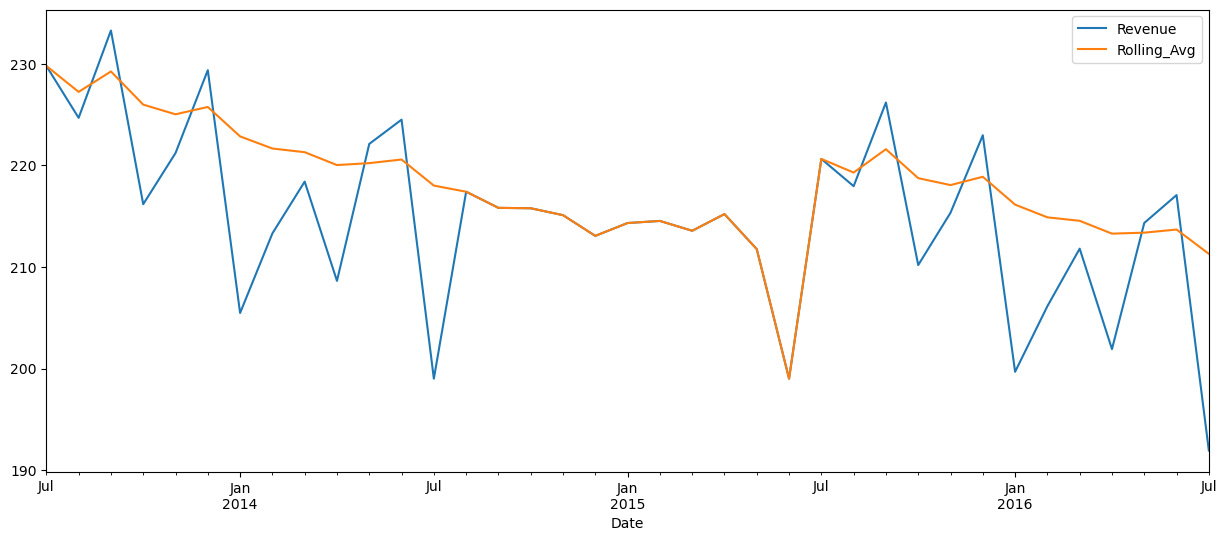

In [30]:
z1.plot(figsize=(15, 6))
plt.show()

In [31]:
# Drop the 'Rolling_Avg' column
z1.drop('Rolling_Avg', axis=1, inplace=True)

z1

,Revenue
Date,
2013-07-31,229.807799
2013-08-31,224.693885
2013-09-30,233.296254
2013-10-31,216.187654
2013-11-30,221.223651
2013-12-31,229.387852
2014-01-31,205.470180
2014-02-28,213.306855
2014-03-31,218.412298


In [32]:
z1.set_index('Date',inplace=True)
z1

KeyError: "None of ['Date'] are in the columns"

In [311]:
csv_file_path='Accessories_data.csv'
z1.to_csv(csv_file_path,index=True)


AttributeError: module 'matplotlib' has no attribute 'show'

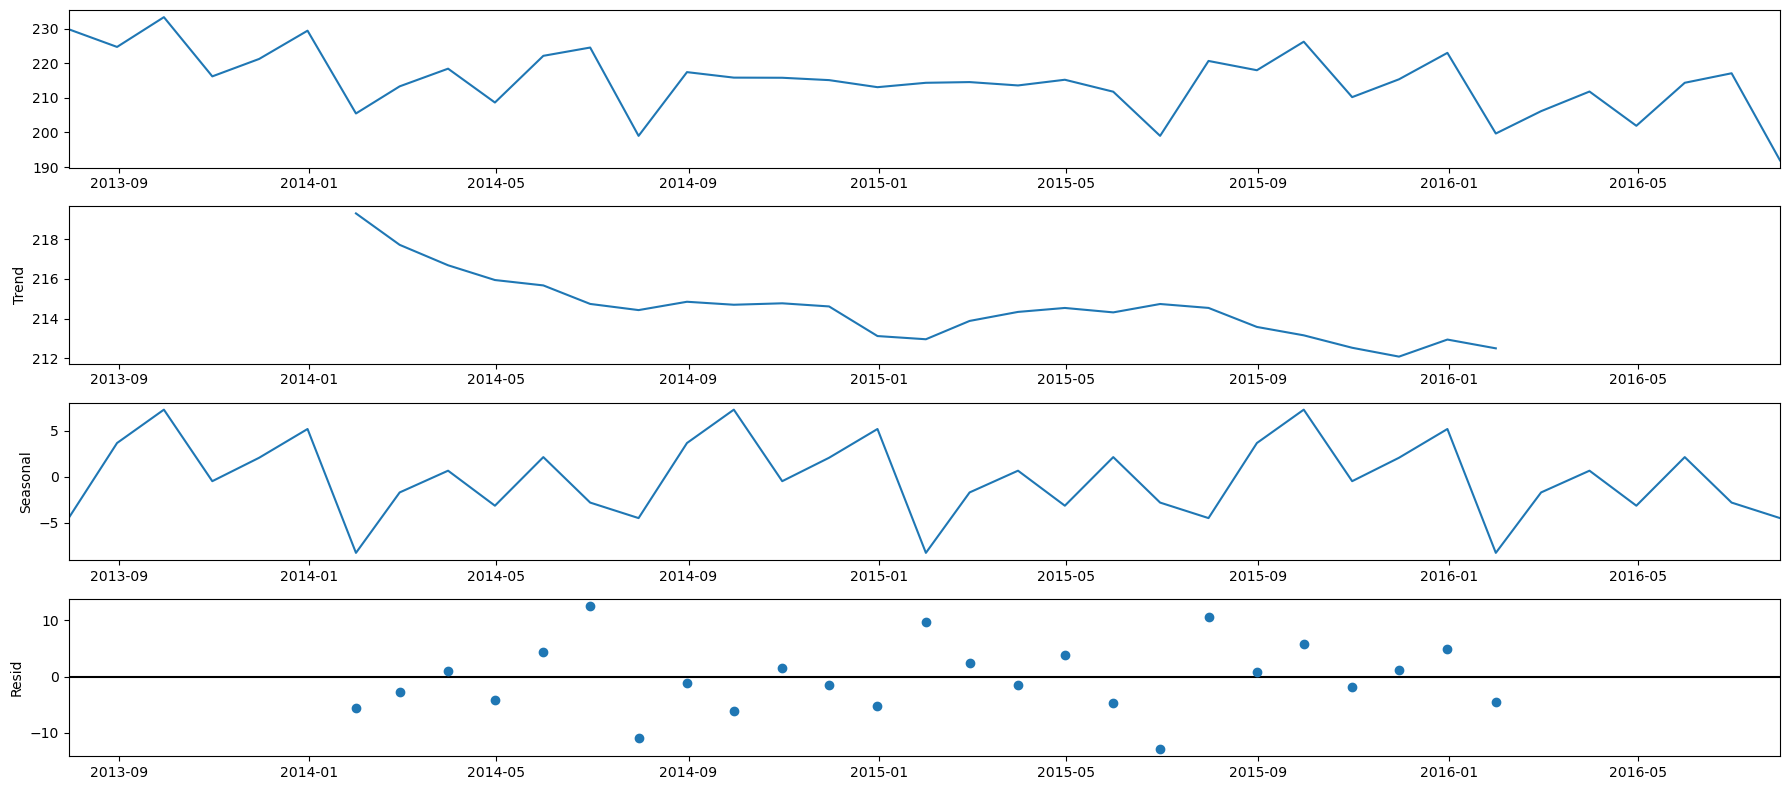

In [33]:

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(z1, model='additive')
fig = decomposition.plot()
plt.show()